In [3]:
import pandas as pd
df = pd.read_csv("app_reviews_ratings(Sheet1).csv")
df

,ratings,bumble,hinge,tinder
0,5_stars,12.00,53.00,14.00
1,4_stars,5.00,2.00,2.00
2,3_stars,7.00,0.00,8.00
3,2_stars,8.00,5.00,6.00
4,1_star,68.00,40.00,70.00
5,total,100.00,100.00,100.00
6,average_rating_per_app,1.85,3.23,1.84


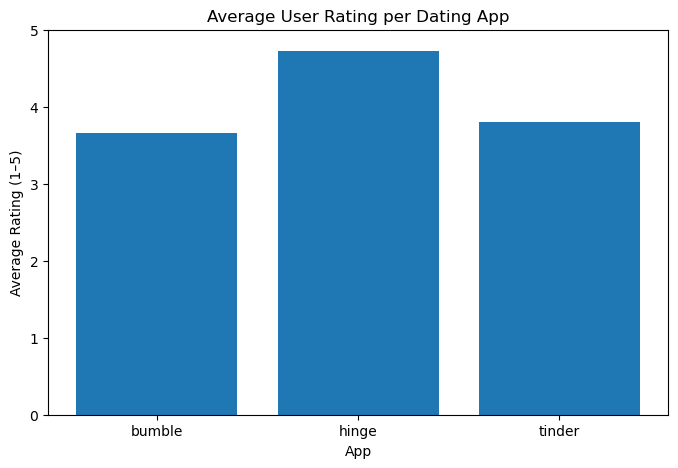

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("app_reviews_ratings(Sheet1).csv")
df
df_ratings = df[df['ratings'].str.contains('_stars')].copy()
df_ratings

rating_map = {
    '5_stars': 5,
    '4_stars': 4,
    '3_stars': 3,
    '2_stars': 2,
    '1_star': 1
}

df_ratings['numeric_rating'] = df_ratings['ratings'].map(rating_map)
df_ratings

apps = ['bumble', 'hinge', 'tinder']
averages = {}

for app in apps:
    avg = (df_ratings['numeric_rating'] * df_ratings[app]).sum() / df_ratings[app].sum()
    averages[app] = round(avg, 2)

averages

plt.figure(figsize=(8,5))
plt.bar(averages.keys(), averages.values())
plt.title("Average User Rating per Dating App")
plt.xlabel("App")
plt.ylabel("Average Rating (1–5)")
plt.ylim(0, 5)
plt.show()

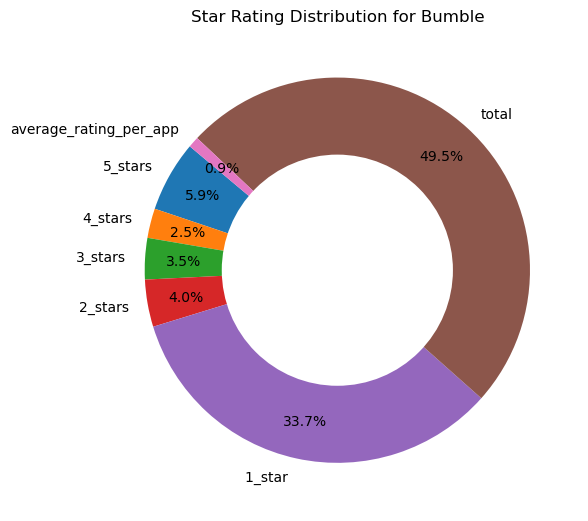

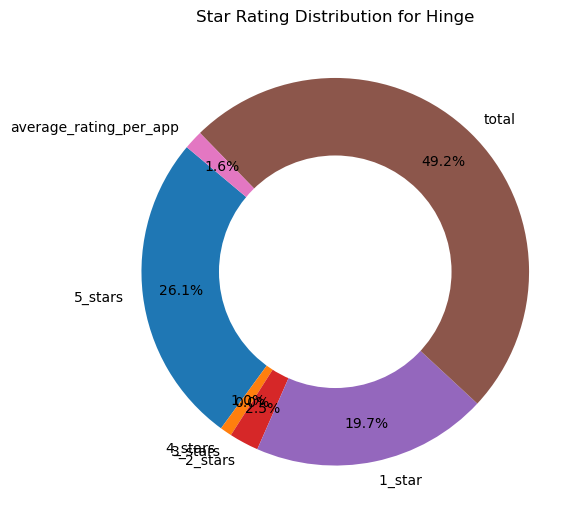

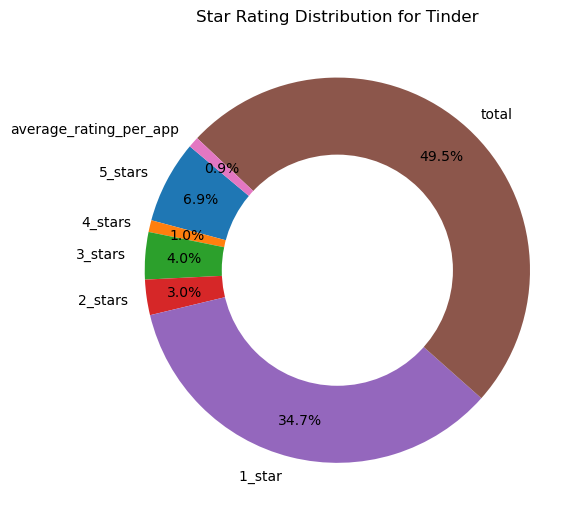

In [28]:
import matplotlib.pyplot as plt

apps = ['bumble', 'hinge', 'tinder']

for app in apps:
    plt.figure(figsize=(6,6))
    plt.pie(df[app],
            labels=df['ratings'],
            autopct='%1.1f%%',
            pctdistance=0.8,
            labeldistance=1.1,
            startangle=140)

    centre_circle = plt.Circle((0,0), 0.60, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.title(f"Star Rating Distribution for {app.capitalize()}")
    plt.tight_layout()
    plt.show()

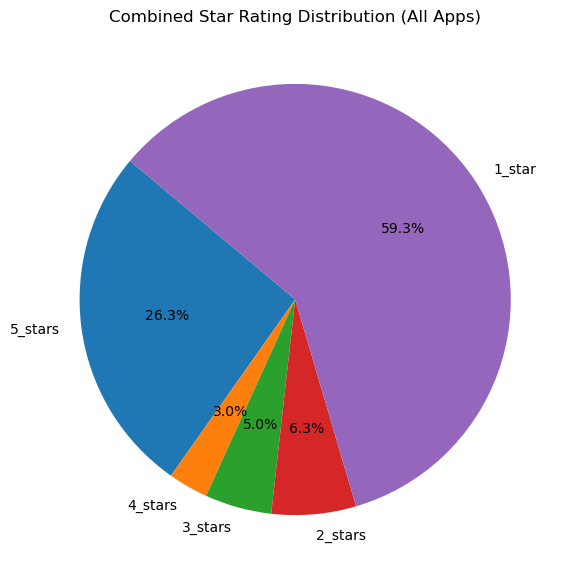

In [36]:
import matplotlib.pyplot as plt

combined_counts = {

    '5_stars': 79, '4_stars': 9, '3_stars': 15, '2_stars': 19, '1_star': 178

}
plt.figure(figsize=(7,7))

plt.pie(combined_counts.values(),
        labels=combined_counts.keys(),
        autopct='%1.1f%%',
        startangle= 140)

plt.title("Combined Star Rating Distribution (All Apps)")
plt.show()